In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os
import datetime

In [3]:
from backtest import *

# 多因子模型

## 数据准备

In [13]:
# read preprocessed factor data
factor_df = pd.DataFrame()
factor_file_path = os.path.join(os.path.abspath('./'), 'factors')
factor_file_list = os.listdir(factor_file_path)
for factor_file in factor_file_list:
    factor_name = factor_file[:-4]
    factor_i = pd.read_csv(factor_file, index_col=0, parse_dates=True)
    if factor_df.empty:
        factor_df = factor_i.stack().to_frame(factor_name)
    else:
        factor_df = factor_df.join(factor_i.stack().to_frame(factor_name), how='outer')

## 模型搭建

In [ ]:
class MyStrategy(object):
    def __init__(self):
        pass
    
    def fit(self, X_train, Y_train):
        pass
    
    def predict(self, X):
        pass

In [ ]:
model = MyStrategy()

## 回测

### 回测的因子需要填充至日频

In [20]:
DataPath = os.path.join(os.path.abspath('./'), 'market_data')
factorFile = 'strategy1.csv'
factorName = factorFile[:-4]
factorPath = os.path.join(os.path.abspath('./'), factorName)
if not os.path.isdir(factorPath):
    os.makedirs(factorPath)

groupNum = 10
startDate = '2013-01-10'
endDate = '2019-12-30'
factorDirection = 'descending'
stgy_parm = BacktestParm(groupNum, startDate, endDate, factorDirection)

figSize = [12, 8]
fontSize = {'title': 24, 'label': 16, 'ticks': 12, 'legend': 12}
color = {'type': {'major': 'c', 'minor': 'b'}, 'alpha': {'major': 0.5, 'minor': 1}}
fig_format = FigFormat(figSize, fontSize, color)

shift_num = 1
mask = pd.read_csv(os.path.join(DataPath, 'mask_basic.csv'), index_col=0, parse_dates=True)
stgy = Backtest(DataPath, factorPath, factorFile, stgy_parm, fig_format, 0.003, mask, shift_num)

groupResults = stgy.groupBacktest()
groupRtn = groupResults.groupRtn
alphaResults = stgy.alpha(groupRtn)

<AxesSubplot:xlabel='TRADE_DATE'>

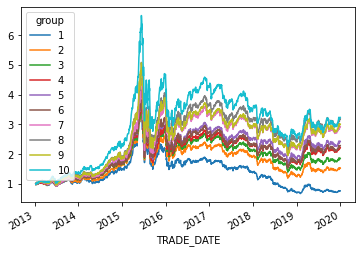

In [23]:
(1 + groupRtn).cumprod().plot()

In [24]:
alphaResults.groupNavStat

,alpha
Total Rtn,1.073216
Annualized Rtn,0.108618
Annualized Vol,0.201488
Sharpe Ratio,0.539077
Winning Ratio,0.589864
PL Ratio,1.123170
maxDD,-0.446944
startDate,2016-11-18 00:00:00
endDate,2018-02-06 00:00:00
